# Multiple variable linear regression

## The gradient descent Algorithm 

In [1]:
def Prediction(w, b, x):
    
    y = np.dot(x,w) + b
    
    return y

def Error(w, b, x, y):
    
    y_hat = Prediction(w, b, x)

    error = y_hat - y
        
    return error

def Cost(x, y, w, b):
    
    m = x.shape[0]
    
    error = Error(w, b, x, y)
        
    J_w_b = np.sum(np.dot(error,error))/(2 * m)
    
    return J_w_b

def gradient_computing(w, b, x, y):
        
    m = x.shape[0]
    
    x_T = np.transpose(x)
        
    error = Error(w, b, x, y)
    
    """
    dj_dw的计算需要用到矩阵转置，我们知道x.shape = (3,4)， 
    error.shape = (3,)，而我们计算dj_dw需要用计算error和
    x每一列的点积。所以我们将x矩阵转置为x_T.shape(4,3)，
    那么np.dot(x_T, error)结果的shape应该为(4,)一个包含
    四个elements的一维数组，4同时也是w的size。Thus，dj_dw
    中是包含dj_dw1 dj_dw2 ... dj_dw4所有偏导数.
    """
    
    dj_dw = np.dot(x_T, error)/m ###使用将x行列互换

    dj_db = np.sum(error)/m
    
    return dj_dw, dj_db

def gradient_descent(w, b, x, y, alpha, iterations):
    
    x_T = np.transpose(x)
    
    """
    J_w_b_log is a Log to record all J_w_b during gradient descent.
    """
    
    J_w_b_log = np.zeros(iterations) 
        
    for i in range(iterations):        
            
        dj_dw, dj_db = gradient_computing(w, b, x, y)
        
        w = w - alpha * dj_dw

        b = b - alpha * dj_db
        
        J_w_b = Cost(x, y, w, b)
        
        if i % 10 == 0:
            
            print("Iteration =", i, "w =", w, "b =", b, "J_w_b =", J_w_b)
        
        J_w_b_log[i] = J_w_b
        
    return w, b, J_w_b, J_w_b_log                 

In [2]:
import numpy as np
# Initialization

X_train = np.array([[2104, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35]])

y_train = np.array([460, 232, 178])

w = np.zeros(len(X_train[0]))
b = 0
alpha = 5.0e-7
iterations = 1000

w, b, J_w_b, J_w_b_log = gradient_descent(w, b, X_train, y_train, alpha, iterations)

print("Best parameters w, b, J_w_b =", w, b, J_w_b)

Iteration = 0 w = [2.41334667e-01 5.58666667e-04 1.83666667e-04 6.03500000e-03] b = 0.000145 J_w_b = 2529.4629522316304
Iteration = 10 w = [2.02186529e-01 5.01486922e-04 3.70616036e-05 4.31821332e-03] b = 9.693078395377562e-05 J_w_b = 696.9610350024591
Iteration = 20 w = [ 2.02204913e-01  5.34437487e-04 -7.78536784e-05  3.59296519e-03] b = 7.279736370399832e-05 J_w_b = 696.8527980817411
Iteration = 30 w = [ 2.02223291e-01  5.67385731e-04 -1.92752331e-04  2.86804138e-03] b = 4.8675356102169905e-05 J_w_b = 696.7446561666907
Iteration = 40 w = [ 0.20224166  0.00060033 -0.00030763  0.00214344] b = 2.4564754292525796e-05 J_w_b = 696.6366091728459
Iteration = 50 w = [ 0.20226002  0.00063328 -0.0004225   0.00141917] b = 4.6555320354469725e-07 J_w_b = 696.5286570158305
Iteration = 60 w = [ 0.20227838  0.00066622 -0.00053735  0.00069521] b = -2.362225223404004e-05 J_w_b = 696.4207996113369
Iteration = 70 w = [ 2.02296720e-01  6.99155463e-04 -6.52180821e-04 -2.84142818e-05] b = -4.76986670872412

In [3]:
print(J_w_b_log)

[2529.46295223  765.833683    699.62902802  697.13374256  697.02965918
  697.0153256   697.00436151  696.99352481  696.9826938   696.97186392
  696.961035    696.95020703  696.93938001  696.92855395  696.91772883
  696.90690466  696.89608144  696.88525918  696.87443786  696.8636175
  696.85279808  696.84197962  696.8311621   696.82034554  696.80952992
  696.79871525  696.78790154  696.77708877  696.76627695  696.75546609
  696.74465617  696.7338472   696.72303918  696.71223211  696.70142598
  696.69062081  696.67981659  696.66901331  696.65821098  696.6474096
  696.63660917  696.62580969  696.61501116  696.60421357  696.59341693
  696.58262125  696.5718265   696.56103271  696.55023986  696.53944797
  696.52865702  696.51786701  696.50707796  696.49628985  696.48550269
  696.47471647  696.46393121  696.45314689  696.44236352  696.43158109
  696.42079961  696.41001908  696.39923949  696.38846085  696.37768316
  696.36690641  696.35613061  696.34535576  696.33458185  696.32380889
  696.31

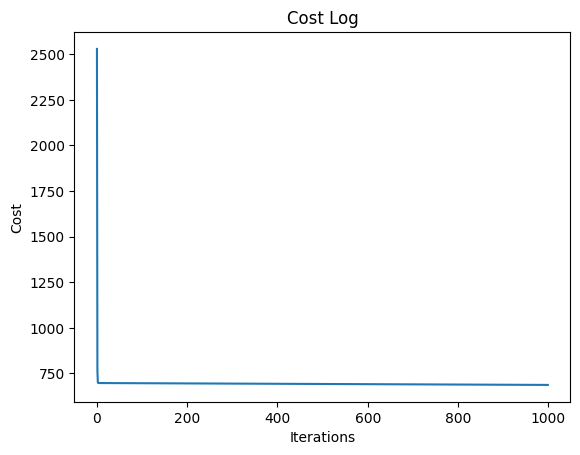

In [4]:
import matplotlib.pyplot as plt

plt.plot(J_w_b_log)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Log")
plt.show()

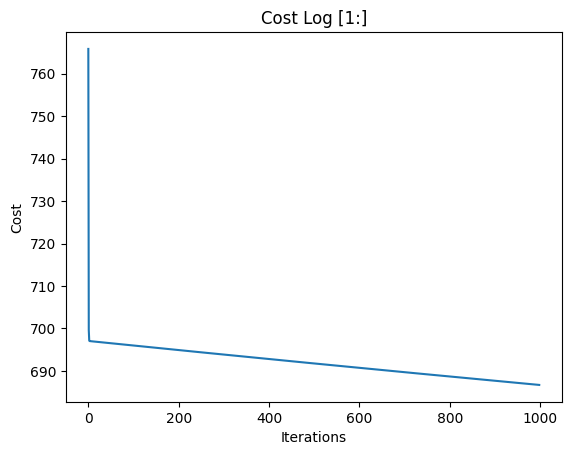

In [5]:
import matplotlib.pyplot as plt

plt.plot(J_w_b_log[1:])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Log [1:]")
plt.show()

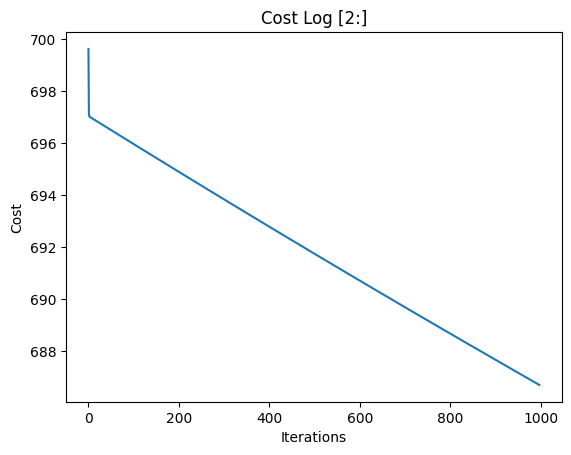

In [6]:
import matplotlib.pyplot as plt

plt.plot(J_w_b_log[2:])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Log [2:]")
plt.show()

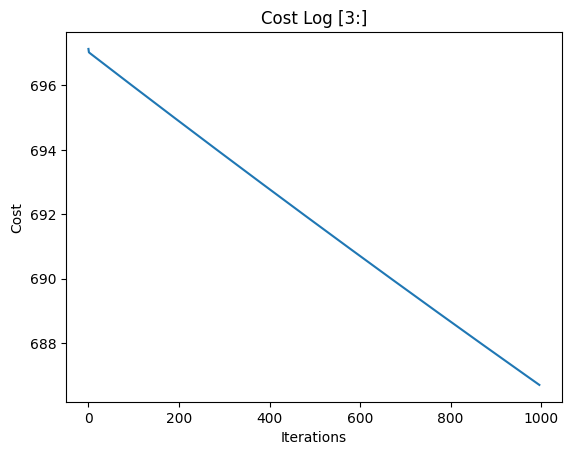

In [7]:
import matplotlib.pyplot as plt

plt.plot(J_w_b_log[3:])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Log [3:]")
plt.show()

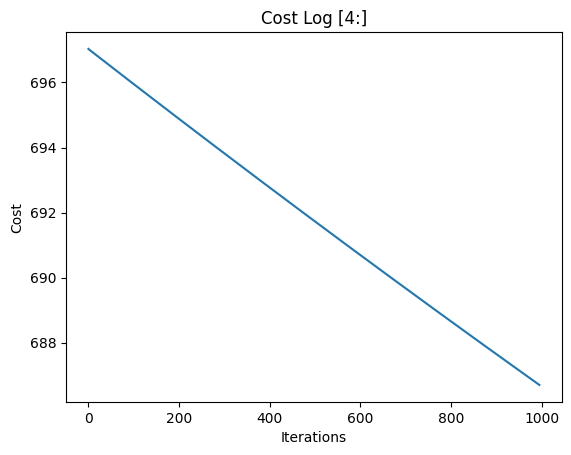

In [8]:
import matplotlib.pyplot as plt

plt.plot(J_w_b_log[4:])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Log [4:]")
plt.show()

## RECEFERENCE

[1]https://github.com/kaieye/2022-Machine-Learning-Specialization/blob/main/Supervised%20Machine%20Learning%20Regression%20and%20Classification/week2/1.Multiple%20linear%20regression/C1_W2_Lab02_Multiple_Variable_Soln.ipynb

[2]https://www.bilibili.com/video/BV1Pa411X76s?p=24&vd_source=8c32dd2bfbfecb1eaa9b0b9c4fb4d83e

[3]https://www.coursera.org/specializations/machine-learning-introduction